### Task-6: K- Means Clustering

This notebook will walk through some of the basics of K-Means Clustering.

### Author: Aniket Surendra Roy
Copyright Aniket Surendra Roy, 2021

**Not for distribution.**

In [18]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

In [25]:
url = "C:/Users/anike/Downloads/Iris.csv"
iris = pd.read_csv(url)
iris_df = pd.DataFrame(iris)
iris_df.head() # See the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


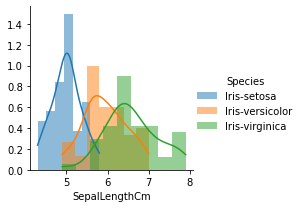

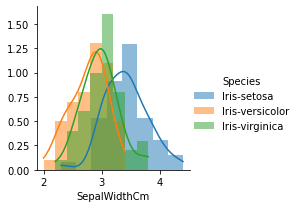

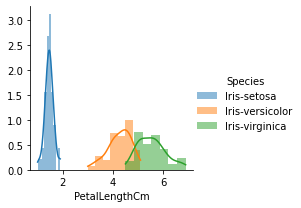

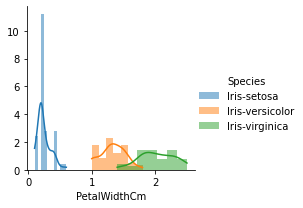

In [38]:
sns.FacetGrid(iris,hue="Species",height=3).map(sns.histplot,"SepalLengthCm",
kde=True, stat="density", linewidth=0).add_legend()
sns.FacetGrid(iris,hue="Species",height=3).map(sns.histplot,"SepalWidthCm",
kde=True, stat="density", linewidth=0).add_legend()
sns.FacetGrid(iris,hue="Species",height=3).map(sns.histplot,"PetalLengthCm",
kde=True, stat="density", linewidth=0).add_legend()
sns.FacetGrid(iris,hue="Species",height=3).map(sns.histplot,"PetalWidthCm",
kde=True, stat="density", linewidth=0).add_legend()
plt.show()

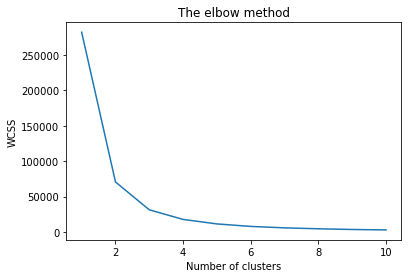

In [41]:

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [39]:

kmeans = KMeans(n_clusters = 5, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

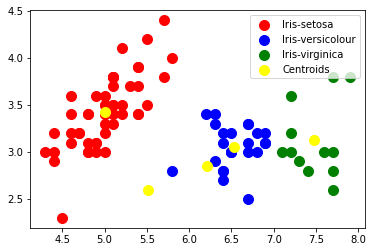

In [40]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()